### モデル評価とは
機械学習で得られた分類モデルや、回帰モデルなどが、正しく機能しているかを検証すること  
  
ここではまず、分類についての評価指標を説明する  
分類は以下の2つの視点で評価される
1. カテゴリの分類精度
2. 予測確立の正確さ

### カテゴリの分類精度
カテゴリの分類精度を定量化する手法には以下のものがある  
* 適合率(precision)
* 再現率(recall)
* F値(F-Value)
* 正解率(accracy)

そして、これらは混同行列(confusion matrix)で計算される  
  
### 混同行列とは
予測と実績のクラスラベルの組み合わせを集計した表  
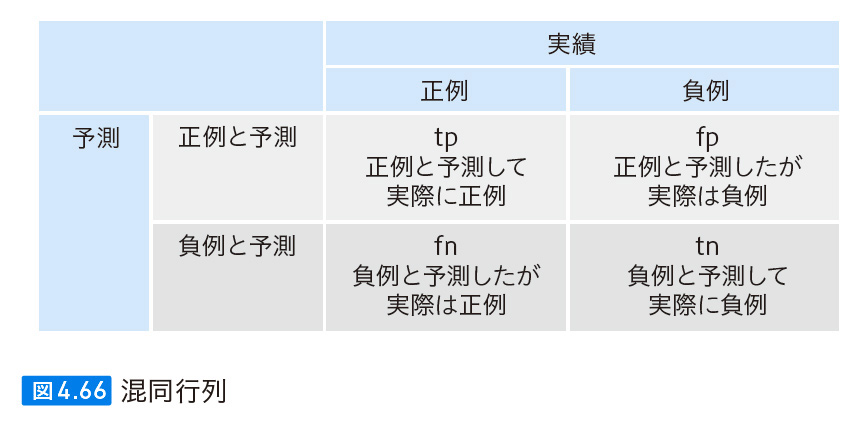  

まず、分類を2値で考える  
イヌかネコか
ここでは、イヌを正例、ネコを負例として扱う  
  
* tp : 実際にイヌで、予測もイヌだった場合
* fn : 実際にイヌで、予測がネコだった場合
* fp : 実際にネコで、予測がイヌだった場合
* tn : 実際にネコで、予測もネコだった場合  
  
t -> True  
f -> False  
  
p -> Positive  
n -> Negative  
  
ここで、分類精度を上げるのは**tpとtn**  
分類精度を下げるのは**fpとfn**  

### 適合率
  
$適合率 = \frac{tp}{tp+fp}$  
  
つまり、イヌと予測した数の内(全positive)、実際に正解だった割合によって、分類精度を評価する指標  
  
### 再現率
  
$再現率 = \frac{tp}{tp+fn}$
  
実際にイヌである数の内(tp+fn)、正しく予測出来ていた割合によって、分類精度を評価する指標  
  
### F値
  
$F = \frac{2}{\frac{1}{適合率}+\frac{1}{再現率}} = 2\times 適合率 \times \frac{再現率}{適合率+再現率}$  
  
適合率と、再現率の調和平均  
**割合の平均を出すときは調和平均が良い**  
  
一般に、適合率と再現率はトレードオフの関係にある  
fpとfnは排反であるため、どちらかでしかない、  
つまり、どちらかが大きければ、もう一方は小さくなる  
  
fp(実際はネコなのに、イヌと予測する数)とfn(実際はイヌなのに、ネコと予測する数)はトレードオフという事  
つまり、イヌと予測しやすいモデルと、ネコと予測しやすいモデルは排反であるという事  
  
F値は、そのバランスを見る事が出来る指標
  
### 正解率  
  
$正解率 = \frac{tp+tn}{tp+fp+fn+tn}$
  
つまり、全体数に対する、正解数の割合によって分類精度を評価する指標

In [3]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

iris = load_iris()
# 評価のため2クラス分類にするための分割
data_set = iris.data[:100,:]
label = iris.target[:100]

train_data,test_data,train_label,test_label = train_test_split(data_set,label,test_size=0.3)

svc = SVC()
svc.fit(train_data,train_label)

label_predict = svc.predict(test_data)

# 評価
from sklearn.metrics import classification_report
print(classification_report(test_label,label_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



precision : 適合率  
recall : 再現率  
f1-score : F値  
support : データ件数  
  
0はクラス0,1はクラス1  
それぞれを正例としたときの各評価指標を出している  
  
今回の場合は、すべての指標において、完璧に分類が出来ている

### 交差検証
機械学習では、交差検証(cross validation)という方法がよく用いられる  
  
これは、学習データとテストデータの分割を複数回行い、  
その分、モデル構築と評価を行う処理  
  
これで、同じデータばかりで学習し、結果が偏るのを防ぎ、  
あらゆるテストを行い、普遍的に分類精度が高いモデルを構築するのに役立つ  